In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# # read file and convert to numpy
data = pd.read_csv("data.csv")  # [569 32]
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0}) # change 1 from char to int
data = data.to_numpy()  # all num to numpy, [569, 32]

# normorlize the data
min_list = np.amin(data, axis=0)
max_list = np.amax(data, axis=0)
data = (data - min_list) / (max_list - min_list)

In [4]:
# split train and test
X, Y = data[:, 2:], data[:, 1]

X_train = X[:int(len(X) * 0.8), :]
X_test = X[int(len(X) * 0.8):, :]

y_train = Y[:int(len(Y) * 0.8)]
y_test = Y[int(len(Y) * 0.8):]

In [5]:
# train the model without feature reduction
model = svm.SVC(kernel = 'rbf')
classes_ = ["B", "M"]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = classification_report(y_test, y_pred, target_names=classes_)
print(score)

              precision    recall  f1-score   support

           B       1.00      0.99      0.99        88
           M       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



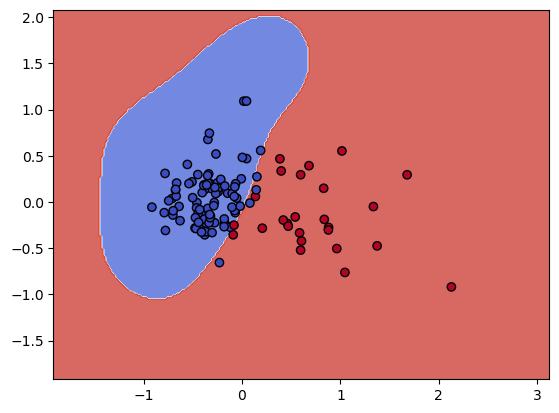

In [6]:
# train the model with feature reduction and visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)

h = .02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



In [7]:
# train an image-based data
X_train = np.load('Feature_Sel_Sauvola_train_features.npy')
X_test = np.load('Feature_Sel_Sauvola_test_features.npy')

# flatten the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

y_train = np.load('Feature_Sel_Sauvola_train_labels.npy')
y_train[y_train=='benign'] = 0
y_train[y_train=='malignant'] = 1
y_train = y_train.astype(np.int32)

y_test = np.load('Feature_Sel_Sauvola_test_labels.npy')
y_test[y_test=='benign'] = 0
y_test[y_test=='malignant'] = 1
y_test = y_test.astype(np.int32)


In [7]:

model = svm.SVC(kernel = 'rbf')
classes_ = ["B", "M"]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = classification_report(y_test, y_pred, target_names=classes_)
print(score)

              precision    recall  f1-score   support

           B       0.28      0.63      0.39       724
           M       0.65      0.30      0.41      1679

    accuracy                           0.40      2403
   macro avg       0.47      0.47      0.40      2403
weighted avg       0.54      0.40      0.40      2403



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

           B       0.28      0.72      0.41       724
           M       0.64      0.22      0.33      1679

    accuracy                           0.37      2403
   macro avg       0.46      0.47      0.37      2403
weighted avg       0.54      0.37      0.35      2403

2403


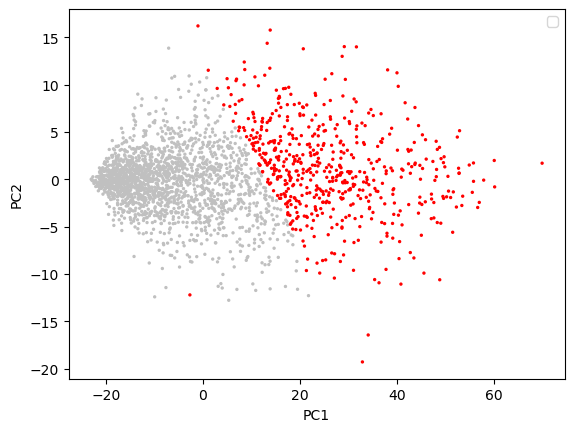

In [8]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
score = classification_report(y_test, y_pred_pca, target_names=classes_)
print(score)

color = ("silver", "red")
color_set = [color[int(l)] for l in y_pred_pca]

print(len(color_set))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], s=2, color=color_set)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()